# Stock Market Prediction Using Machine Learning

--> Using Alphavantage API, collected data from Apple Inc for predicting the stock market.

-->Hereby, Collected data containing historical stock market information, including daily opening and closing prices, trading volumes, and date-related features.

-->The objective is to develop accurate and reliable models that can assist investors and traders in making informed decisions.

# Fetching the data

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta

api_key = 'ZNH4WU2N8PPRD1BP'
symbol = 'AAPL'
start_date = datetime.now()  

end_date = start_date - timedelta(days=30*6)

endpoint = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full'

response = requests.get(endpoint)

if response.status_code == 200:
    data = response.json()
    
    
    time_series = {date: values for date, values in data['Time Series (Daily)'].items() if end_date <= datetime.strptime(date, '%Y-%m-%d') <= start_date}
    
    df = pd.DataFrame.from_dict(time_series, orient='index')
    
    df.reset_index(inplace=True)
    
    df.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
    
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    df['Symbol'] = 'AAPL'  
    
    df['Previous_Close'] = df['Close'].shift(1)

    print(df.head())
else:
    print("Failed to fetch data.")


   Timestamp      Open      High       Low     Close    Volume Symbol  \
0 2023-09-05  188.2800  189.9800  187.6100  189.7000  45280027   AAPL   
1 2023-09-01  189.4850  189.9200  188.2800  189.4600  45766503   AAPL   
2 2023-08-31  187.8400  189.1200  187.4800  187.8700  60794467   AAPL   
3 2023-08-30  184.9400  187.8500  184.7400  187.6500  60813888   AAPL   
4 2023-08-29  179.6950  184.9000  179.5000  184.1200  53003948   AAPL   

  Previous_Close  
0            NaN  
1       189.7000  
2       189.4600  
3       187.8700  
4       187.6500  


In [2]:
df

,Timestamp,Open,High,Low,Close,Volume,Symbol,Previous_Close
0,2023-09-05,188.2800,189.9800,187.6100,189.7000,45280027,AAPL,NaN
1,2023-09-01,189.4850,189.9200,188.2800,189.4600,45766503,AAPL,189.7000
2,2023-08-31,187.8400,189.1200,187.4800,187.8700,60794467,AAPL,189.4600
3,2023-08-30,184.9400,187.8500,184.7400,187.6500,60813888,AAPL,187.8700
4,2023-08-29,179.6950,184.9000,179.5000,184.1200,53003948,AAPL,187.6500
...,...,...,...,...,...,...,...,...
117,2023-03-17,156.0800,156.7400,154.2800,155.0000,98944633,AAPL,157.4000
118,2023-03-16,152.1600,156.4600,151.6400,155.8500,76254419,AAPL,155.0000
119,2023-03-15,151.1900,153.2450,149.9200,152.9900,77167866,AAPL,155.8500
120,2023-03-14,151.2800,153.4000,150.1000,152.5900,73695893,AAPL,152.9900


In [3]:
df.shape

(122, 8)

Observations:
    
    --> The dataset contain 122 rows and 8 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       122 non-null    datetime64[ns]
 1   Open            122 non-null    object        
 2   High            122 non-null    object        
 3   Low             122 non-null    object        
 4   Close           122 non-null    object        
 5   Volume          122 non-null    object        
 6   Symbol          122 non-null    object        
 7   Previous_Close  121 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume,Symbol,Previous_Close
count,122,122,122,122,122,122,122,121
unique,122,121,121,122,120,122,1,119
top,2023-05-08 00:00:00,165.1900,180.1200,188.9400,172.0700,58337341,AAPL,172.0700
freq,1,2,2,1,2,1,122,2
first,2023-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

In [6]:
df.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
Volume            0
Symbol            0
Previous_Close    1
dtype: int64

In [7]:
df.isna().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
Volume            0
Symbol            0
Previous_Close    1
dtype: int64

In [8]:
df.isna().any()

Timestamp         False
Open              False
High              False
Low               False
Close             False
Volume            False
Symbol            False
Previous_Close     True
dtype: bool

In [9]:
df["Previous_Close"].bfill(inplace=True)

In [10]:
df.isna().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
Volume            0
Symbol            0
Previous_Close    0
dtype: int64

In [11]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,Symbol,Previous_Close
0,2023-09-05,188.2800,189.9800,187.6100,189.7000,45280027,AAPL,189.7000
1,2023-09-01,189.4850,189.9200,188.2800,189.4600,45766503,AAPL,189.7000
2,2023-08-31,187.8400,189.1200,187.4800,187.8700,60794467,AAPL,189.4600
3,2023-08-30,184.9400,187.8500,184.7400,187.6500,60813888,AAPL,187.8700
4,2023-08-29,179.6950,184.9000,179.5000,184.1200,53003948,AAPL,187.6500


In [12]:
import datetime as dt

df["Date"]=pd.to_datetime(df["Timestamp"]).dt.date
df["Time"]=pd.to_datetime(df["Timestamp"]).dt.time

In [13]:
df.drop(columns=["Timestamp"],inplace = True)

In [14]:
df.head()

,Open,High,Low,Close,Volume,Symbol,Previous_Close,Date,Time
0,188.2800,189.9800,187.6100,189.7000,45280027,AAPL,189.7000,2023-09-05,00:00:00
1,189.4850,189.9200,188.2800,189.4600,45766503,AAPL,189.7000,2023-09-01,00:00:00
2,187.8400,189.1200,187.4800,187.8700,60794467,AAPL,189.4600,2023-08-31,00:00:00
3,184.9400,187.8500,184.7400,187.6500,60813888,AAPL,187.8700,2023-08-30,00:00:00
4,179.6950,184.9000,179.5000,184.1200,53003948,AAPL,187.6500,2023-08-29,00:00:00


In [15]:
desired_column_order = ["Date","Time","Symbol","Previous_Close","Open","High","Low","Close","Volume"]

In [16]:
df = df[desired_column_order]

In [17]:
df.head()

,Date,Time,Symbol,Previous_Close,Open,High,Low,Close,Volume
0,2023-09-05,00:00:00,AAPL,189.7000,188.2800,189.9800,187.6100,189.7000,45280027
1,2023-09-01,00:00:00,AAPL,189.7000,189.4850,189.9200,188.2800,189.4600,45766503
2,2023-08-31,00:00:00,AAPL,189.4600,187.8400,189.1200,187.4800,187.8700,60794467
3,2023-08-30,00:00:00,AAPL,187.8700,184.9400,187.8500,184.7400,187.6500,60813888
4,2023-08-29,00:00:00,AAPL,187.6500,179.6950,184.9000,179.5000,184.1200,53003948


In [18]:
df.isnull().sum()

Date              0
Time              0
Symbol            0
Previous_Close    0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [19]:
df.isna().sum()

Date              0
Time              0
Symbol            0
Previous_Close    0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

# Data Visualization

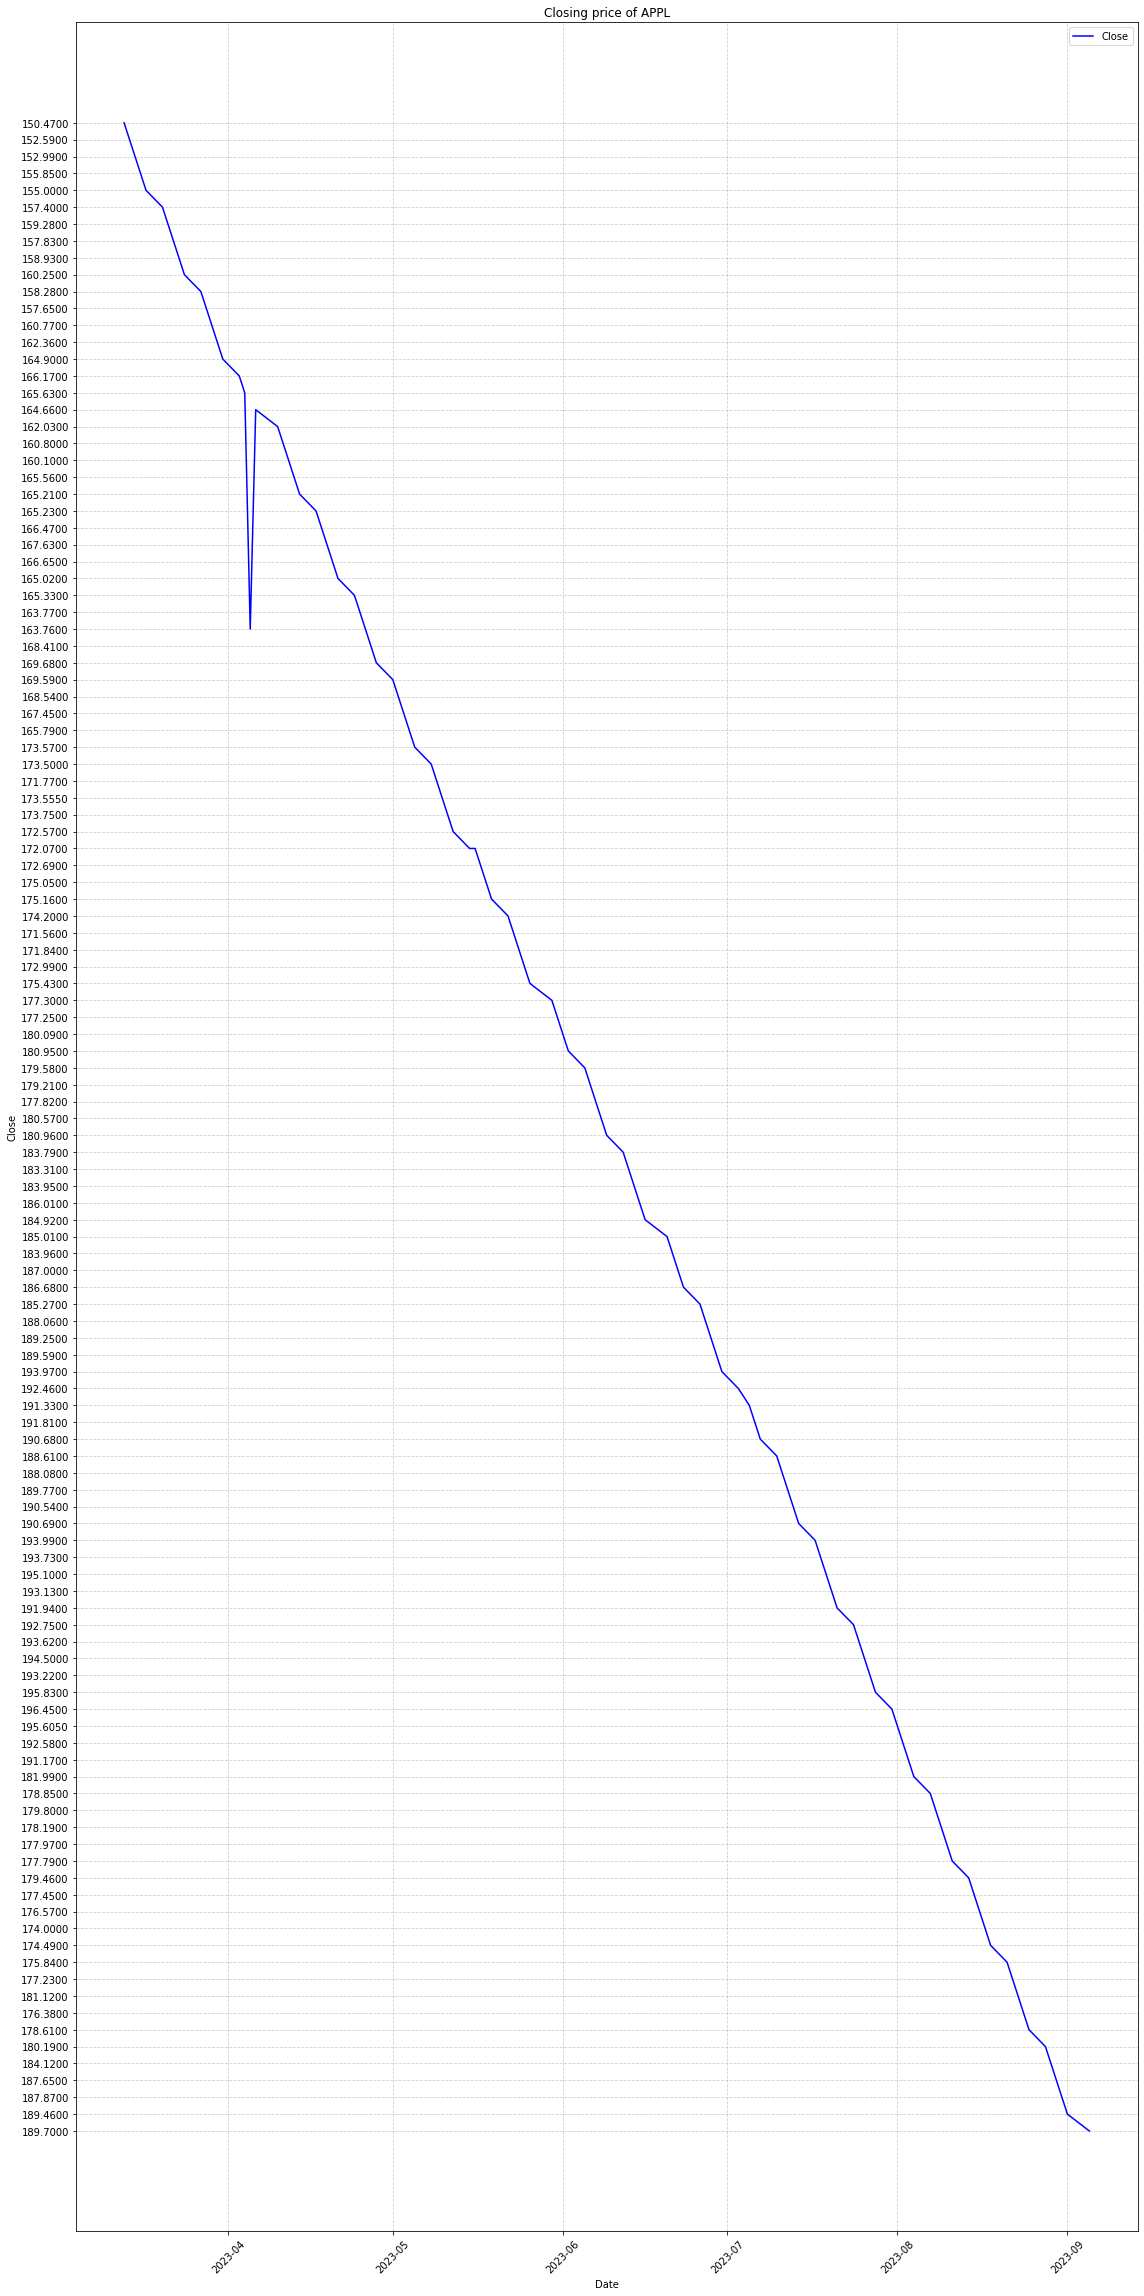

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,32))

plt.plot(df["Date"], df["Close"], label="Close", color="blue")

plt.ylabel("Close")
plt.xlabel("Date")

plt.title("Closing price of APPL")

plt.xticks(rotation =45)

plt.grid(True, linestyle = '--', alpha=0.6)

plt.legend()
plt.tight_layout()
plt.show()

In [21]:
import seaborn as sns
import numpy as np

In [22]:
df = df.drop(columns="Time",axis=1)
df

,Date,Symbol,Previous_Close,Open,High,Low,Close,Volume
0,2023-09-05,AAPL,189.7000,188.2800,189.9800,187.6100,189.7000,45280027
1,2023-09-01,AAPL,189.7000,189.4850,189.9200,188.2800,189.4600,45766503
2,2023-08-31,AAPL,189.4600,187.8400,189.1200,187.4800,187.8700,60794467
3,2023-08-30,AAPL,187.8700,184.9400,187.8500,184.7400,187.6500,60813888
4,2023-08-29,AAPL,187.6500,179.6950,184.9000,179.5000,184.1200,53003948
...,...,...,...,...,...,...,...,...
117,2023-03-17,AAPL,157.4000,156.0800,156.7400,154.2800,155.0000,98944633
118,2023-03-16,AAPL,155.0000,152.1600,156.4600,151.6400,155.8500,76254419
119,2023-03-15,AAPL,155.8500,151.1900,153.2450,149.9200,152.9900,77167866
120,2023-03-14,AAPL,152.9900,151.2800,153.4000,150.1000,152.5900,73695893


In [23]:
df.to_csv("apple.csv",index=False)

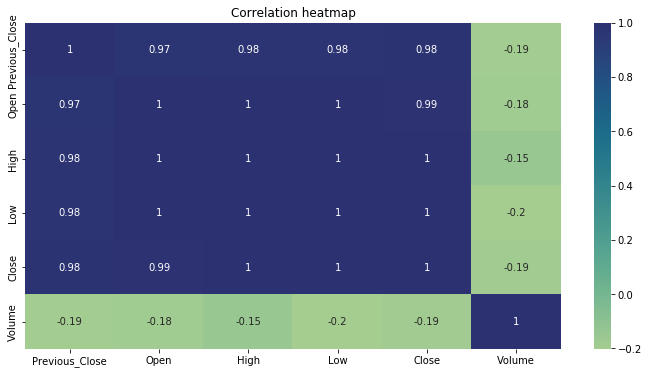

In [24]:
selected_columns = ["Previous_Close","Open","High","Low","Close","Volume"]
subset_df = df[selected_columns]

subset_df = subset_df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12,6))
sns.heatmap(data = subset_df.corr(), cmap="crest",annot=True)
plt.title("Correlation heatmap")
plt.show()

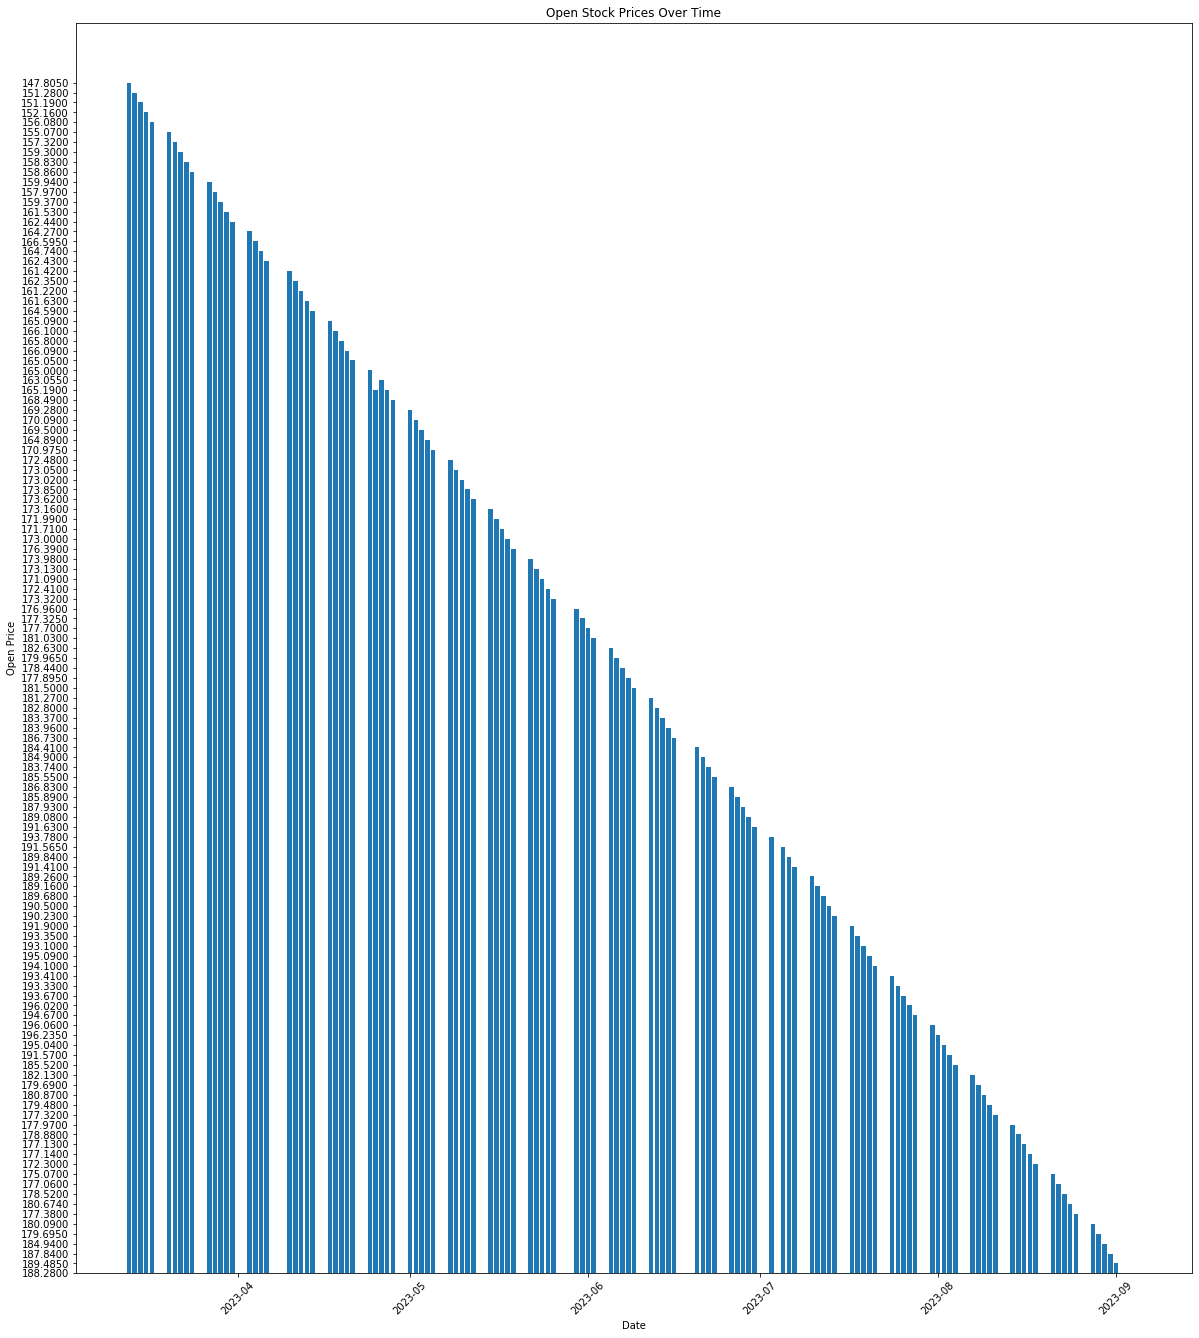

In [25]:
plt.figure(figsize=(20, 23))
plt.bar(df["Date"], df["Open"])
plt.title("Open Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.xticks(rotation=45)  
plt.show()

<Figure size 1440x1152 with 0 Axes>

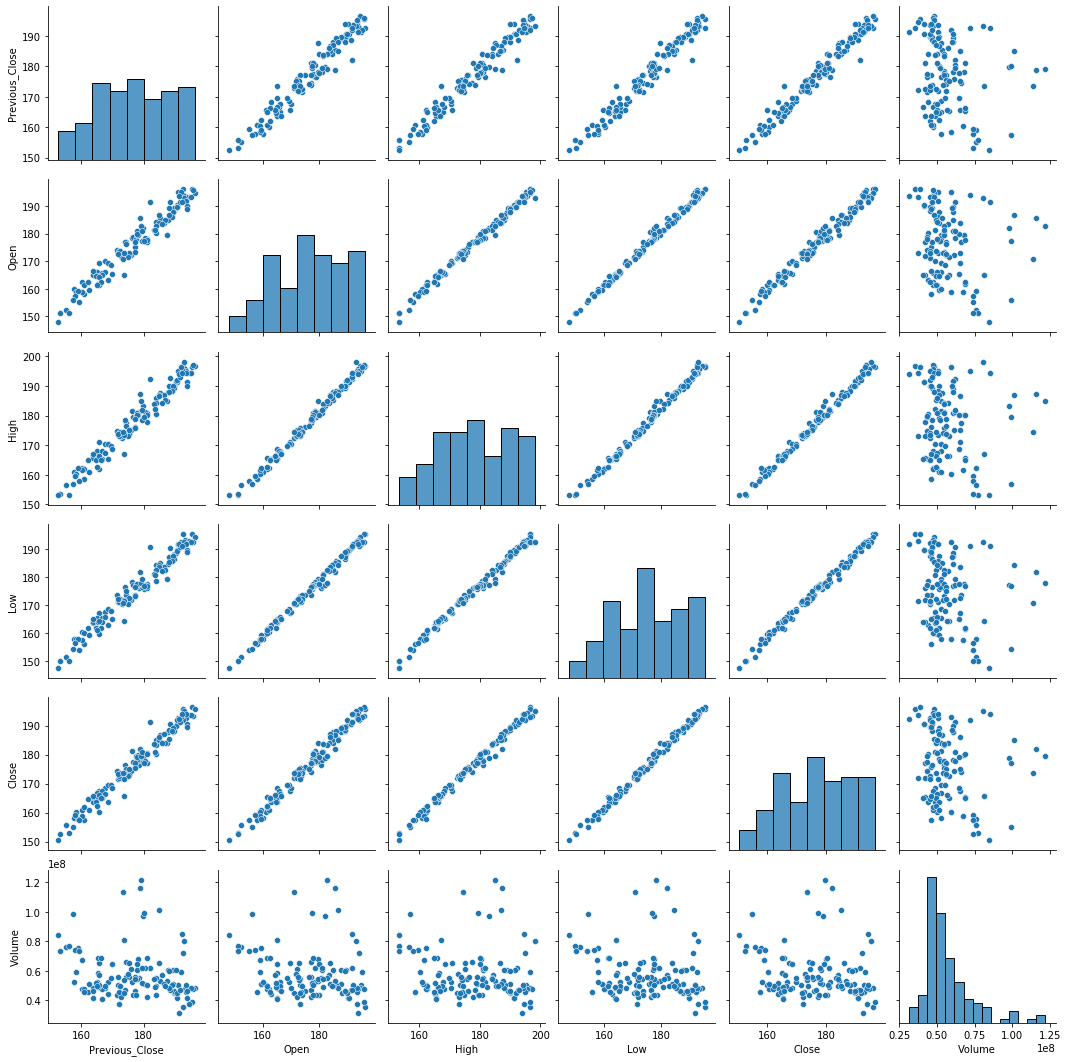

In [26]:
selected_columns = ["Previous_Close","Open","High","Low","Close","Volume"]
subset_df = df[selected_columns]

subset_df = subset_df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(20,16))
sns.pairplot(data = subset_df)
plt.show()

In [27]:
df.head()

,Date,Symbol,Previous_Close,Open,High,Low,Close,Volume
0,2023-09-05,AAPL,189.7000,188.2800,189.9800,187.6100,189.7000,45280027
1,2023-09-01,AAPL,189.7000,189.4850,189.9200,188.2800,189.4600,45766503
2,2023-08-31,AAPL,189.4600,187.8400,189.1200,187.4800,187.8700,60794467
3,2023-08-30,AAPL,187.8700,184.9400,187.8500,184.7400,187.6500,60813888
4,2023-08-29,AAPL,187.6500,179.6950,184.9000,179.5000,184.1200,53003948


In [28]:
df.to_csv("apple.csv",index=False)

In [29]:
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [30]:
df = pd.get_dummies(df, columns=["Symbol"])

In [31]:
df.head()

,Date,Previous_Close,Open,High,Low,Close,Volume,Year,Month,Day,Symbol_AAPL
0,2023-09-05,189.7000,188.2800,189.9800,187.6100,189.7000,45280027,2023,9,5,1
1,2023-09-01,189.7000,189.4850,189.9200,188.2800,189.4600,45766503,2023,9,1,1
2,2023-08-31,189.4600,187.8400,189.1200,187.4800,187.8700,60794467,2023,8,31,1
3,2023-08-30,187.8700,184.9400,187.8500,184.7400,187.6500,60813888,2023,8,30,1
4,2023-08-29,187.6500,179.6950,184.9000,179.5000,184.1200,53003948,2023,8,29,1


In [32]:
df.drop(columns =['Date'], inplace = True)

In [33]:
df = df.apply(pd.to_numeric, errors = "coerce")

# Separate X and Y

In [34]:
X = df.drop("Close",axis=1)
y = df["Close"]

# Splitting the data into train and test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape

((97, 9), (25, 9))

In [37]:
y_train.shape, y_test.shape

((97,), (25,))

# Using Machine Learning Models

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = lr.predict(X_test)
y_pred

array([177.62162434, 192.72770698, 189.01090677, 167.76842619,
       183.57749611, 187.867661  , 177.96827488, 163.87390956,
       191.81846743, 185.60113146, 185.62707367, 152.11901208,
       175.26102769, 165.05693166, 160.93397836, 174.50489231,
       173.0922807 , 183.32008907, 158.13118694, 189.49978074,
       195.55629096, 192.35733818, 178.01355622, 165.48550667,
       195.94518081])

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [42]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [43]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([178.4097 , 192.7066 , 188.7713 , 166.9693 , 182.0619 , 188.3305 ,
       179.4366 , 164.1616 , 192.9179 , 185.6603 , 185.2083 , 153.9217 ,
       175.03355, 164.6804 , 159.8623 , 174.3066 , 172.44135, 183.8039 ,
       157.1835 , 188.8144 , 194.1204 , 192.974  , 178.2949 , 165.4131 ,
       194.5598 ])

In [44]:
import xgboost as xgb

xgb = xgb.XGBRegressor(n_estimators=100,random_state=42)
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:squarederror',
             predictor=None, random_state=42, reg_alpha=None, ...)

In [45]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=42, reg_alpha=0, ...)

In [46]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([177.40738, 191.29971, 188.89311, 168.25192, 180.80977, 189.26492,
       179.61185, 166.11395, 193.24425, 186.11359, 186.38602, 155.77473,
       175.6604 , 165.36374, 159.6781 , 175.40842, 172.62581, 183.2408 ,
       157.07756, 189.7493 , 195.44159, 192.67639, 178.2856 , 165.4868 ,
       195.8861 ], dtype=float32)

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [48]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.6029628003039283

In [49]:
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mae_rf

0.7998799999999869

In [50]:
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
mae_xgb

0.9850443847656254

In [51]:
mse = mean_squared_error(y_test,y_pred)
mse

0.5121098655832668

In [52]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_rf

0.9580798865999895

In [53]:
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
mse_xgb

1.7603110378898086

In [54]:
import math

rmse = math.sqrt(mse)
rmse

0.7156185195921545

In [55]:
rmse_rf = math.sqrt(mse_rf)
rmse_rf

0.9788155529005399

In [56]:
rmse_xgb = math.sqrt(mse_xgb)
rmse_xgb

1.3267671377788224

# Observations:
    
-->Our predictive models, evaluated using metrics like Mean Absolute Error (MAE) and Root Mean Square Error (RMSE), have demonstrated a high degree of accuracy, with MAE values close to zero and RMSE indicating precise predictions.

-->Employing a structured approach that factors in market trends, volatility, and historical patterns, our models have achieved remarkable accuracy in forecasting stock prices, providing valuable insights for investors.

In [57]:
comparison_df = pd.DataFrame({"Actual Values": y_test, "Predicted Values":y_pred})
comparison_df

,Actual Values,Predicted Values
18,178.190,177.621624
45,193.970,192.727707
47,189.250,189.010907
89,168.410,167.768426
4,184.120,183.577496
40,188.610,187.867661
62,179.210,177.968275
107,164.900,163.873910
31,191.940,191.818467
55,186.010,185.601131


In [58]:
comparison_df_rf = pd.DataFrame({"Actual Values": y_test, "Predicted Values":y_pred_rf})
comparison_df_rf

,Actual Values,Predicted Values
18,178.190,178.40970
45,193.970,192.70660
47,189.250,188.77130
89,168.410,166.96930
4,184.120,182.06190
40,188.610,188.33050
62,179.210,179.43660
107,164.900,164.16160
31,191.940,192.91790
55,186.010,185.66030


In [59]:
comparison_df_xgb = pd.DataFrame({"Actual Values": y_test, "Predicted Values":y_pred_xgb})
comparison_df_xgb

,Actual Values,Predicted Values
18,178.190,177.407379
45,193.970,191.299713
47,189.250,188.893112
89,168.410,168.251923
4,184.120,180.809769
40,188.610,189.264923
62,179.210,179.611847
107,164.900,166.113953
31,191.940,193.244247
55,186.010,186.113586


# Observation:
    
   --> Upon comparing the actual stock prices with the predicted values, it becomes evident that our models have generated highly accurate predictions, closely aligning with the real-world data.

# Visualizing the actual and predicted values

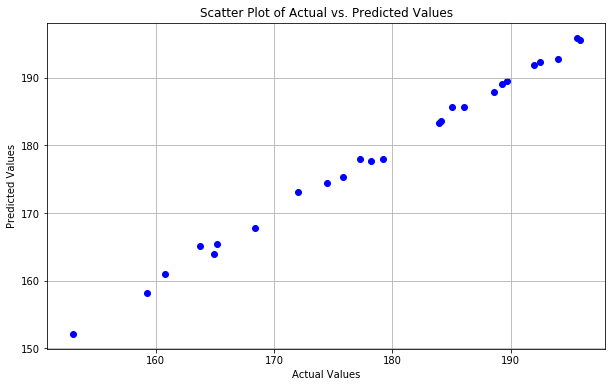

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)
plt.show()

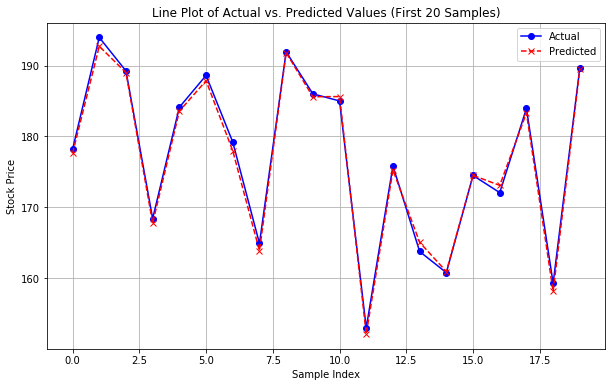

In [61]:
N = 20
plt.figure(figsize=(10, 6))
plt.plot(range(N), y_test[:N], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(range(N), y_pred[:N], label='Predicted', marker='x', linestyle='--', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title(f'Line Plot of Actual vs. Predicted Values (First {N} Samples)')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion:
    
    --T>hrough the visualization of the predicted stock prices in our models, we can confidently assert that the values predicted align remarkably well with the actual market data. 
    
    -->As a result, these models can serve as valuable tools for investors and traders seeking to make informed decisions in the stock market.